In [2022]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2023]:
df = pd.read_csv("NBA_Dataset.csv")
df

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,2022,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.2,0.126,0.1,2.1,2.2,0.9,0.000,0.00,0.00,0.500
17693,2022,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,10.0,0.181,7.1,-2.0,5.2,4.8,0.000,1.56,1.55,0.524
17694,2022,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,2.1,0.145,-1.4,0.4,-1.0,0.2,0.000,4.45,4.23,0.646
17695,2022,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.1,0.143,-1.2,-1.0,-2.1,0.0,0.000,-8.88,-8.55,0.329


In [2024]:
df.isnull().sum()

season                 0
player                 0
pos                    0
age                    0
team_id                0
g                      0
gs                     0
mp_per_g               0
fg_per_g               0
fga_per_g              0
fg_pct                63
fg3_per_g              0
fg3a_per_g             0
fg3_pct             2623
fg2_per_g              0
fg2a_per_g             0
fg2_pct              106
efg_pct               63
ft_per_g               0
fta_per_g              0
ft_pct               576
orb_per_g              0
drb_per_g              0
trb_per_g              0
ast_per_g              0
stl_per_g              0
blk_per_g              0
tov_per_g              0
pf_per_g               0
pts_per_g              0
mp                     0
per                    3
ts_pct                55
fg3a_per_fga_pct      63
fta_per_fga_pct       63
orb_pct                3
drb_pct                3
trb_pct                3
ast_pct                3
stl_pct                3


In [2025]:
df = df.fillna(0)
num_duplicates = df.duplicated().sum()
df = df.drop_duplicates(subset=['season', 'player'], keep='last')
df.isnull().sum()

season              0
player              0
pos                 0
age                 0
team_id             0
g                   0
gs                  0
mp_per_g            0
fg_per_g            0
fga_per_g           0
fg_pct              0
fg3_per_g           0
fg3a_per_g          0
fg3_pct             0
fg2_per_g           0
fg2a_per_g          0
fg2_pct             0
efg_pct             0
ft_per_g            0
fta_per_g           0
ft_pct              0
orb_per_g           0
drb_per_g           0
trb_per_g           0
ast_per_g           0
stl_per_g           0
blk_per_g           0
tov_per_g           0
pf_per_g            0
pts_per_g           0
mp                  0
per                 0
ts_pct              0
fg3a_per_fga_pct    0
fta_per_fga_pct     0
orb_pct             0
drb_pct             0
trb_pct             0
ast_pct             0
stl_pct             0
blk_pct             0
tov_pct             0
usg_pct             0
ows                 0
dws                 0
ws        

In [2026]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17675 entries, 0 to 17696
Data columns (total 55 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            17675 non-null  int64  
 1   player            17675 non-null  object 
 2   pos               17675 non-null  object 
 3   age               17675 non-null  int64  
 4   team_id           17675 non-null  object 
 5   g                 17675 non-null  int64  
 6   gs                17675 non-null  int64  
 7   mp_per_g          17675 non-null  float64
 8   fg_per_g          17675 non-null  float64
 9   fga_per_g         17675 non-null  float64
 10  fg_pct            17675 non-null  float64
 11  fg3_per_g         17675 non-null  float64
 12  fg3a_per_g        17675 non-null  float64
 13  fg3_pct           17675 non-null  float64
 14  fg2_per_g         17675 non-null  float64
 15  fg2a_per_g        17675 non-null  float64
 16  fg2_pct           17675 non-null  float64
 17

In [2027]:
numeric_columns = df.select_dtypes(include='number')
corr_matrix = numeric_columns.corr()
mvp_matrix = corr_matrix['award_share']
print(mvp_matrix)

season             -0.015702
age                 0.018310
g                   0.090688
gs                  0.171973
mp_per_g            0.169005
fg_per_g            0.277832
fga_per_g           0.251800
fg_pct              0.068756
fg3_per_g           0.083179
fg3a_per_g          0.083690
fg3_pct             0.029290
fg2_per_g           0.275668
fg2a_per_g          0.252319
fg2_pct             0.064319
efg_pct             0.061745
ft_per_g            0.323682
fta_per_g           0.323749
ft_pct              0.046256
orb_per_g           0.120026
drb_per_g           0.221249
trb_per_g           0.197904
ast_per_g           0.205740
stl_per_g           0.185980
blk_per_g           0.149599
tov_per_g           0.236686
pf_per_g            0.074211
pts_per_g           0.291960
mp                  0.174965
per                 0.226624
ts_pct              0.081092
fg3a_per_fga_pct   -0.022128
fta_per_fga_pct     0.054915
orb_pct             0.007565
drb_pct             0.082383
trb_pct       

In [2028]:
drop_columns = ['season', 'age', 'orb_pct', 'ft_pct', 'orb_pct', 'drb_pct', 'trb_pct']
numeric_columns.drop(columns=drop_columns, inplace=True)
corr_matrix = numeric_columns.corr()
mvp_matrix = corr_matrix['award_share']
print(mvp_matrix)


g                   0.090688
gs                  0.171973
mp_per_g            0.169005
fg_per_g            0.277832
fga_per_g           0.251800
fg_pct              0.068756
fg3_per_g           0.083179
fg3a_per_g          0.083690
fg3_pct             0.029290
fg2_per_g           0.275668
fg2a_per_g          0.252319
fg2_pct             0.064319
efg_pct             0.061745
ft_per_g            0.323682
fta_per_g           0.323749
orb_per_g           0.120026
drb_per_g           0.221249
trb_per_g           0.197904
ast_per_g           0.205740
stl_per_g           0.185980
blk_per_g           0.149599
tov_per_g           0.236686
pf_per_g            0.074211
pts_per_g           0.291960
mp                  0.174965
per                 0.226624
ts_pct              0.081092
fg3a_per_fga_pct   -0.022128
fta_per_fga_pct     0.054915
ast_pct             0.145602
stl_pct             0.044682
blk_pct             0.038309
tov_pct            -0.026427
usg_pct             0.204065
ows           

was_mvp
0    17634
1       41
Name: count, dtype: int64


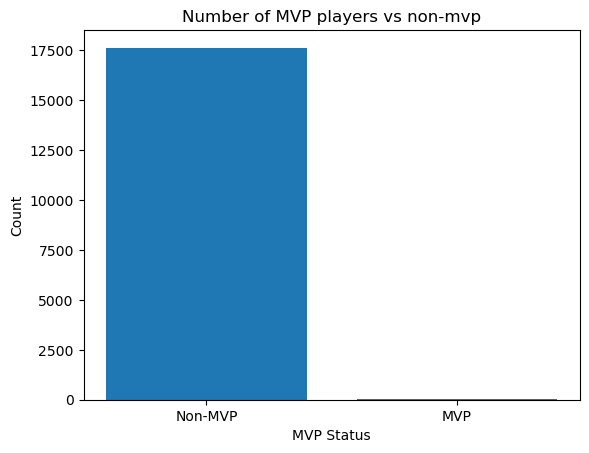

In [2029]:
mvps = df.groupby(by = 'season').max('award_share')
mvps['was_mvp'] = '1'
df = df.merge(mvps[['award_share', 'was_mvp']], on = ['season', 'award_share'], how = 'left')
df['was_mvp'] = df['was_mvp'].fillna(value = 0)
df['was_mvp'] = df['was_mvp'].astype(int)
value_counts = df['was_mvp'].value_counts()
print(value_counts)

plt.bar(value_counts.index, value_counts.values)
plt.xlabel('MVP Status')
plt.ylabel('Count')
plt.title('Number of MVP players vs non-mvp')
plt.xticks([0, 1], ['Non-MVP', 'MVP'])
plt.show()

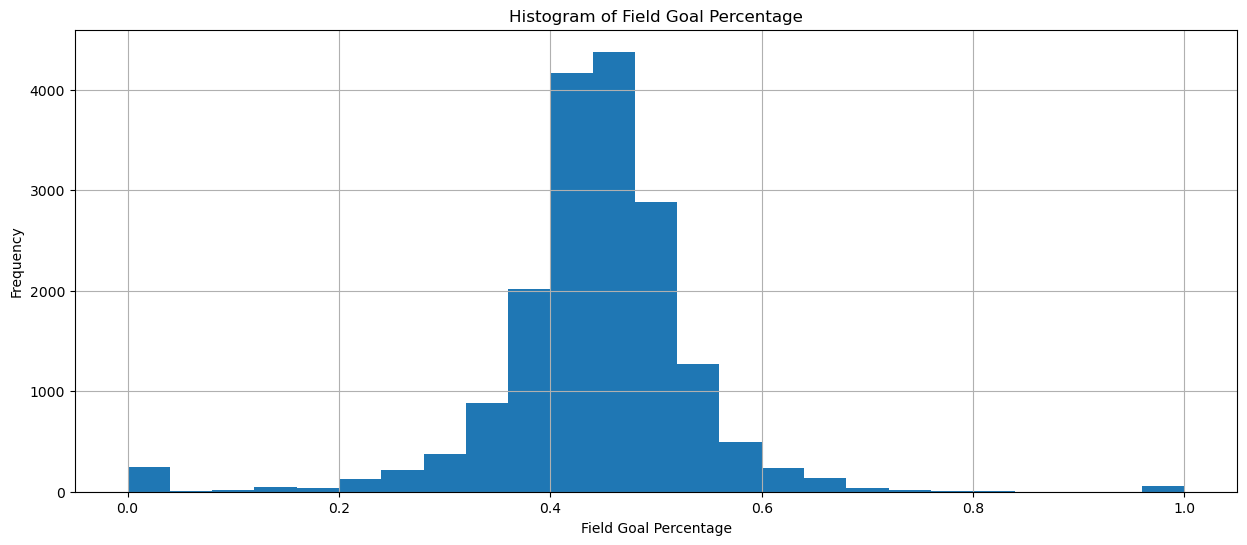

In [2030]:
df['fg_pct'].hist(bins=25, figsize=(15, 6))
plt.title('Histogram of Field Goal Percentage')
plt.xlabel('Field Goal Percentage')
plt.ylabel('Frequency')
plt.show()


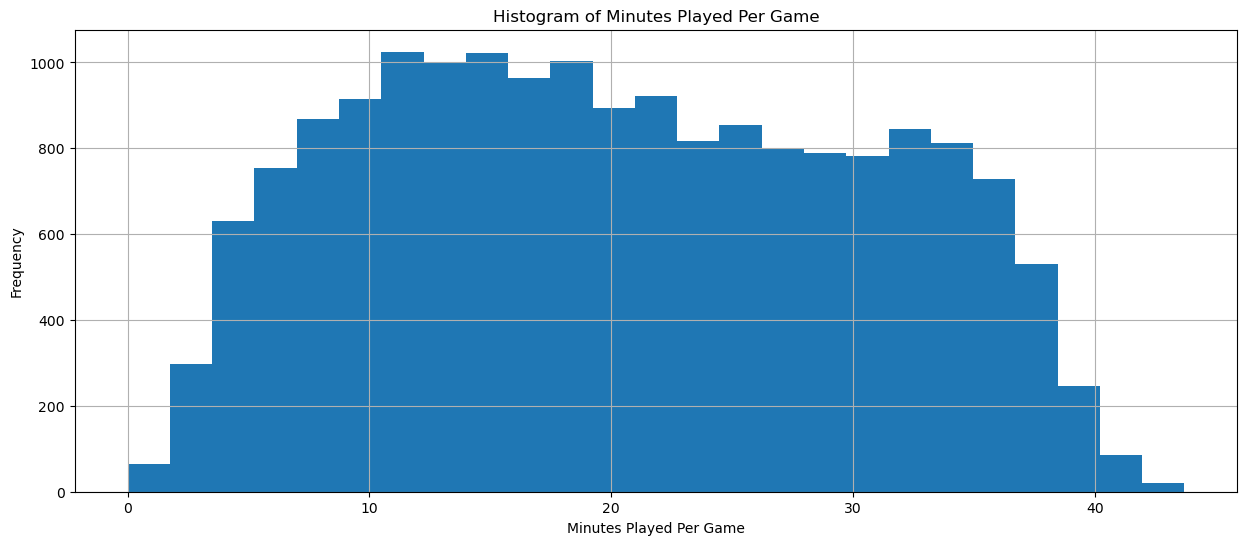

In [2031]:
df['mp_per_g'].hist(bins=25, figsize=(15, 6))
plt.title('Histogram of Minutes Played Per Game')
plt.xlabel('Minutes Played Per Game')
plt.ylabel('Frequency')
plt.show()

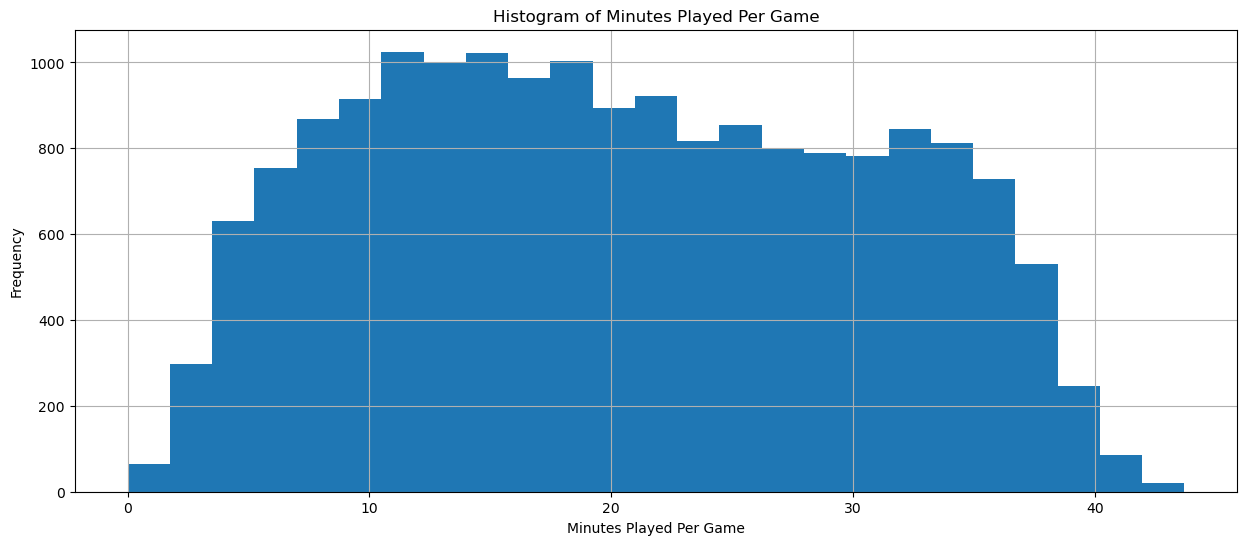

In [2032]:
df['mp_per_g'].hist(bins=25, figsize=(15, 6))
plt.title('Histogram of Minutes Played Per Game')
plt.xlabel('Minutes Played Per Game')
plt.ylabel('Frequency')
plt.show()

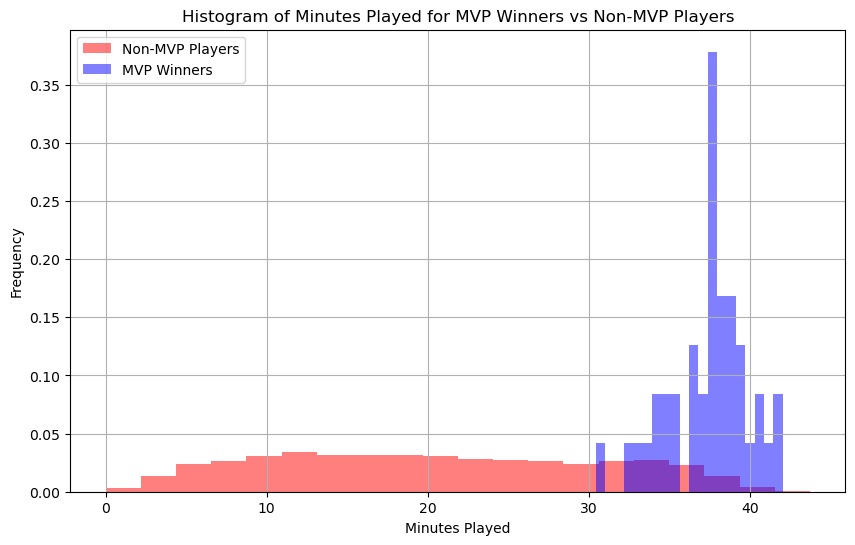

In [2033]:
import matplotlib.pyplot as plt

mvp_players = df[df['was_mvp'] == 1]['mp_per_g']

non_mvp_players = df[df['was_mvp'] == 0]['mp_per_g']

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(non_mvp_players, bins=20, alpha=0.5, color='red',density = True, label='Non-MVP Players')
plt.hist(mvp_players, bins=20, alpha=0.5, color='blue', density = True, label='MVP Winners')
plt.xlabel('Minutes Played')
plt.ylabel('Frequency')
plt.title('Histogram of Minutes Played for MVP Winners vs Non-MVP Players')
plt.legend()
plt.grid(True)
plt.show()


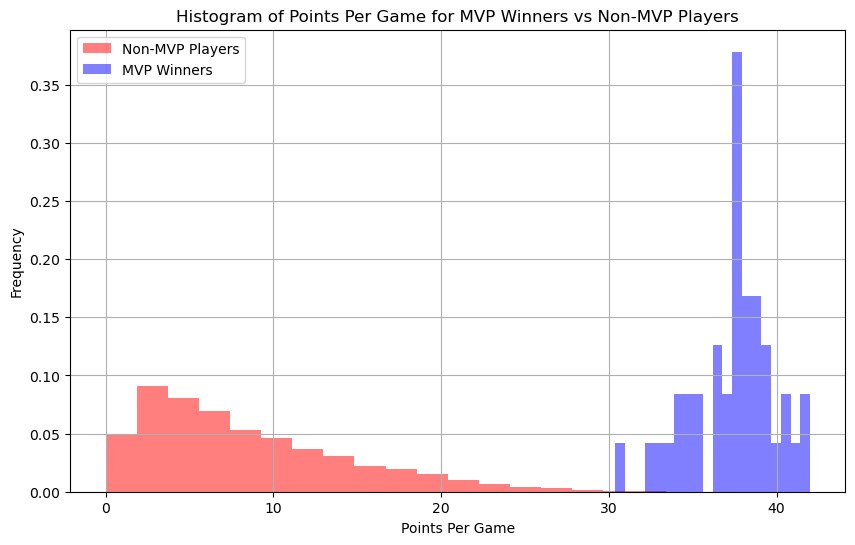

In [2034]:
import matplotlib.pyplot as plt

non_mvp_players = df[df['was_mvp'] == 0]['pts_per_g']
plt.figure(figsize=(10, 6))
plt.hist(non_mvp_players, bins=20, alpha=0.5, color='red',density = True, label='Non-MVP Players')
plt.hist(mvp_players, bins=20, alpha=0.5, color='blue', density = True, label='MVP Winners')
plt.xlabel('Points Per Game')
plt.ylabel('Frequency')
plt.title('Histogram of Points Per Game for MVP Winners vs Non-MVP Players')
plt.legend()
plt.grid(True)
plt.show()


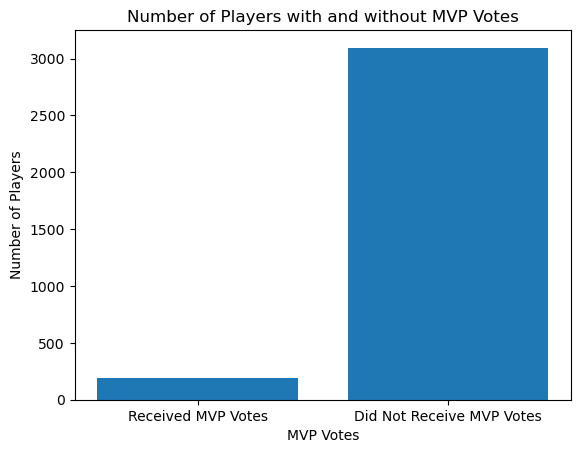

In [2035]:
playersMVPVotes = df[df['award_share'] != 0]['player'].nunique()
totalPlayers = df['player'].nunique()
playersWithoutVotes = totalPlayers - playersMVPVotes

plt.bar(['Received MVP Votes', 'Did Not Receive MVP Votes'], [playersMVPVotes, playersWithoutVotes])
plt.xlabel('MVP Votes')
plt.ylabel('Number of Players')
plt.title('Number of Players with and without MVP Votes')
plt.show()

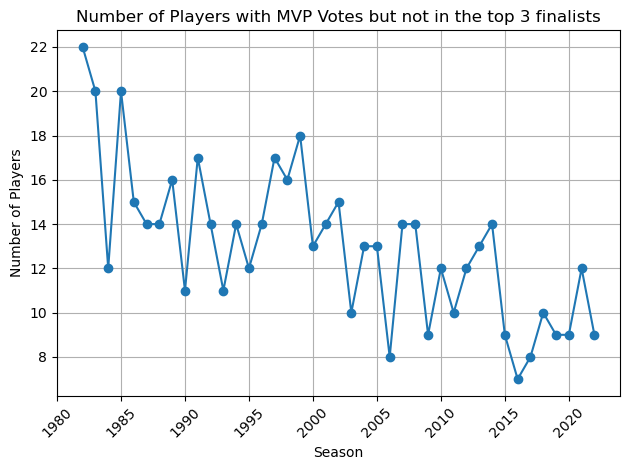

In [2036]:
mvpVotesBySeason = df[df['award_share'] != 0].groupby('season')['player'].unique()
top3FinalistsPerSeason = df.groupby('season').apply(lambda x: x.nlargest(3, 'award_share')['player'].unique())

playersNotTop3 = {}
for season, mvp_votes in mvpVotesBySeason.items():
    top3 = top3FinalistsPerSeason.loc[season]
    playersNotTop3[season] = len([player for player in mvp_votes if player not in top3])

seasons = list(playersNotTop3.keys())
counts = list(playersNotTop3.values())

plt.plot(seasons, counts, marker='o', linestyle='-')
plt.xlabel('Season')
plt.ylabel('Number of Players')
plt.title('Number of Players with MVP Votes but not in the top 3 finalists')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [2037]:
avgGamesMVP = df[df['was_mvp'] == 1]['gs'].mean()
avgGamesNotMVP = df[df['was_mvp'] == 0]['gs'].mean()
avgMPGMVP = df[df['was_mvp'] == 1]['mp_per_g'].mean()
avgMPGNotMVP = df[df['was_mvp'] == 0]['mp_per_g'].mean()
avgAge= df[df['was_mvp'] == 1]['age'].mean()
avgPPG= df[df['was_mvp'] == 1]['pts_per_g'].mean()
avgPPGNotMVP = df[df['was_mvp'] == 0]['pts_per_g'].mean()


print("Average number of games played by an MVP:", avgGamesMVP)
print("Average number of games played by NON MVP:", avgGamesNotMVP)
print("Average minutes per game played by an MVP:", avgMPGMVP)
print("Average minutes per game played by NON MVP:", avgMPGNotMVP)
print("Average age for an MVP:", avgAge)
print("Average PPG for an MVP:", avgPPG)
print("Average PPG for a non MVP:", avgPPGNotMVP)

Average number of games played by an MVP: 77.1951219512195
Average number of games played by NON MVP: 25.91737552455484
Average minutes per game played by an MVP: 37.363414634146345
Average minutes per game played by NON MVP: 20.366609958035614
Average age for an MVP: 27.634146341463413
Average PPG for an MVP: 27.0
Average PPG for a non MVP: 8.37287626176704


In [2038]:
# Remove gs < 20
cleaned_df = df[df["gs"] > 20]
cleaned_df = cleaned_df[cleaned_df["mp_per_g"] > 25]
cleaned_df = cleaned_df[cleaned_df["pts_per_g"] > 10]
print(cleaned_df)


       season               player pos  age team_id   g  gs  mp_per_g  \
0        1982  Kareem Abdul-Jabbar   C   34     LAL  76  76      35.2   
1        1982          Alvan Adams   C   27     PHO  79  75      30.3   
4        1982       Tiny Archibald  PG   33     BOS  68  51      31.9   
8        1982         Greg Ballard  SF   27     WSB  79  79      37.3   
13       1982          Kent Benson   C   27     DET  75  72      32.9   
...       ...                  ...  ..  ...     ...  ..  ..       ...   
17645    2022    Russell Westbrook  PG   33     LAL  78  78      34.3   
17647    2022        Derrick White  SG   27     TOT  75  52      29.3   
17651    2022       Andrew Wiggins  SF   26     GSW  73  73      31.9   
17664    2022       Christian Wood   C   26     HOU  68  67      30.8   
17671    2022           Trae Young  PG   23     ATL  76  76      34.9   

       fg_per_g  fga_per_g  ...  ws_per_48  obpm  dbpm  bpm  vorp  \
0           9.9       17.1  ...      0.192   3.8   1.2

In [2039]:
import statsmodels.api as sm

X = cleaned_df.drop(['award_share', 'player', 'team_id', 'pos'], axis = 1)
Y = cleaned_df['award_share']
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            award_share   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        15:58:39   Log-Likelihood:                 6359.0
No. Observations:                4690   AIC:                        -1.261e+04
Df Residuals:                    4637   BIC:                        -1.227e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4263      0.328  

In [2040]:
colsKeep = ['fg_pct', 'fg3_pct', 'efg_pct', 'fta_per_g', 'ft_pct', 'pf_per_g', 
                   'mp', 'ts_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'tov_pct',
                   'ws_per_48', 'vorp', 'win_loss_pct']

X_reduced = cleaned_df[colsKeep]
Y = cleaned_df['award_share']
X_reduced = sm.add_constant(X_reduced)
model = sm.OLS(Y,X_reduced).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            award_share   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     168.2
Date:                Tue, 07 May 2024   Prob (F-statistic):               0.00
Time:                        15:58:39   Log-Likelihood:                 4507.7
No. Observations:                4690   AIC:                            -8985.
Df Residuals:                    4675   BIC:                            -8889.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0238      0.034  

In [2041]:
X = X_reduced
y = cleaned_df.award_share 

train_X = X[df['season'] <= 2010]
val_X = X[df['season'] > 2010]
train_y = y[df['season'] <= 2010]
val_y = y[df['season'] > 2010]

scaler = StandardScaler()

train_X_scaled = scaler.fit_transform(train_X)
val_X_scaled = scaler.transform(val_X)

/var/folders/k3/26jsdq196ndg3f6tbwkyr30h0000gn/T/ipykernel_94618/995033931.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_X = X[df['season'] <= 2010]
/var/folders/k3/26jsdq196ndg3f6tbwkyr30h0000gn/T/ipykernel_94618/995033931.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val_X = X[df['season'] > 2010]


In [2042]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


forest_model = RandomForestRegressor(random_state=1, max_depth = 7)
forest_model.fit(train_X_scaled, train_y)
predictions = forest_model.predict(val_X_scaled)
mae = mean_absolute_error(predictions, val_y)
r2 = r2_score(val_y, predictions)
print('Average MAE: '+ str(mae))
print('R2 value: ' + str(r2))
print(predictions)

Average MAE: 0.018239191730536133
R2 value: 0.6254820202580507
[0.00018972 0.00279761 0.00271567 ... 0.00018972 0.00019647 0.02734767]


In [2043]:
season_2011_df = cleaned_df[cleaned_df['season'] == 2011]
predictions.sort()
players_predictions = pd.DataFrame({'Player': player, 'Prediction': predictions})
sorted_predictions = players_predictions.sort_values(by='Prediction', ascending=False)
print(season_2011_df)


       season             player pos  age team_id   g  gs  mp_per_g  fg_per_g  \
11599    2011      Arron Afflalo  SG   25     DEN  69  69      33.7       4.5   
11604    2011  LaMarcus Aldridge  PF   25     POR  81  81      39.6       8.7   
11606    2011          Ray Allen  SG   35     BOS  80  80      36.1       6.0   
11614    2011    Carmelo Anthony  SF   26     TOT  77  77      35.7       8.9   
11617    2011       Trevor Ariza  SF   25     NOH  75  75      34.7       4.0   
...       ...                ...  ..  ...     ...  ..  ..       ...       ...   
12032    2011     Deron Williams  PG   26     TOT  65  65      37.9       6.6   
12036    2011    Marvin Williams  SF   24     ATL  65  52      28.7       3.8   
12037    2011        Mo Williams  PG   28     TOT  58  56      30.8       5.0   
12045    2011      Dorell Wright  SF   25     GSW  82  82      38.4       5.9   
12047    2011         Nick Young  SG   25     WAS  64  40      31.8       6.4   

       fga_per_g  ...  ws_p

In [2044]:
df = pd.read_csv("NBA_Dataset.csv")
df.fillna(0)
df
# Remove outliers that have no chance of ever winning MVP, NBA rules state you must play atleast 35 games to be eligible
df = df[df["gs"] > 5]
df = df[df["mp_per_g"] > 10] 
df= df[df["pts_per_g"] > 5]


In [2045]:
df['season'].unique()
training = df[df['season'] <= 2015]
testing = df[(df['season'] >= 2016) & (df['season'] <= 2020)]
training_data_X = training.drop(['award_share', 'pos', 'team_id', 'player', 'ws_per_48', 'fg3_pct', 'mov', 'ows', 'dws', 'mp'], axis = 1)
training_data_Y = training['award_share']
testing_data_X = testing.drop(['award_share', 'pos', 'team_id', 'player', 'ws_per_48', 'fg3_pct', 'mov', 'ows', 'dws', 'mp'], axis = 1)
testing_data_Y = testing['award_share']

validation = df[(df['season'] >= 2021) & (df['season'] <= 2022)]
validation_data_X = validation.drop(['award_share', 'pos', 'team_id', 'player', 'ws_per_48', 'fg3_pct', 'mov', 'ows', 'dws', 'mp'], axis=1)
validation_data_Y = validation['award_share']

In [2046]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(training_data_X,training_data_Y)
y_pred_linreg = linReg.predict(testing_data_X)
score_linreg = linReg.score(training_data_X,training_data_Y)
print("R-squared:", score_linreg)
print("MSE:", mean_squared_error(testing_data_Y, y_pred_linreg))

R-squared: 0.3727274837800947
MSE: 0.00421842418530686


In [2047]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
training_data_X_scaled = scaler.fit_transform(training_data_X)
testing_data_X_scaled = scaler.transform(testing_data_X)

knn_model = KNeighborsRegressor(n_neighbors=11)  

knn_model.fit(training_data_X_scaled, training_data_Y)
y_pred_knn = knn_model.predict(testing_data_X_scaled)
mse = mean_squared_error(testing_data_Y, y_pred_knn)
r2 = r2_score(testing_data_Y, y_pred_knn)
print('KNN Regression Mean Squared Error:', mse)
print('KNN Regression R-squared:', r2)



KNN Regression Mean Squared Error: 0.0019041846420891732
KNN Regression R-squared: 0.7043592869045258


In [2049]:
y_pred_2021_2022 = knn_model.predict(validation_data_X)
predictions_2021_2022_df = pd.DataFrame({'Predicted': y_pred_2021_2022})
predictions_2021_2022_df['player'] = validation['player'].values
predictions_2021_2022_df['season'] = validation['season'].values

predictions_2021 = predictions_2021_2022_df[predictions_2021_2022_df['season'] == 2021]
predictions_2022 = predictions_2021_2022_df[predictions_2021_2022_df['season'] == 2022]
predictions_2021_sorted = predictions_2021.sort_values(by='Predicted', ascending=False)
predictions_2022_sorted = predictions_2022.sort_values(by='Predicted', ascending=False)

print("Sorted Predictions for the 2021 season:")
print(predictions_2021_sorted.head())
print("\nSorted Predictions for the 2022 season:")
print(predictions_2022_sorted.head())

Sorted Predictions for the 2021 season:
     Predicted                 player  season
141   0.391636           Nikola Jokić    2021
7     0.390273  Giannis Antetokounmpo    2021
81    0.390273           Kevin Durant    2021
26    0.390273           Bradley Beal    2021
269   0.390273        Zion Williamson    2021

Sorted Predictions for the 2022 season:
     Predicted                 player  season
426   0.391636           Nikola Jokić    2022
286   0.391636  Giannis Antetokounmpo    2022
356   0.390273           Kevin Durant    2022
420   0.390273           LeBron James    2022
361   0.383455            Joel Embiid    2022


/Users/nihanthattaluri/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
